# Stability of setting the eigenvalues

## Notebook setup

### Magics

In [1]:
%reset -f
%load_ext autoreload
%autoreload 2
%matplotlib inline

### Imports

In [2]:
import numpy as np
import numpy.random as npr

from matplotlib import pyplot as plt
plt.rcParams['figure.dpi'] = 150

## Plot
Here we show how the condition number of the matrix $P$ is affected by features of the initial connectivity matrix $J_0$ and the complexity of the desired network output.

We show that the condition number
* decreases with the network size $N$
* increases with the number of controlled eigenvalues $K$
* increases if the desired eigenvalues are far from the eigenvalues of $J_0$ 

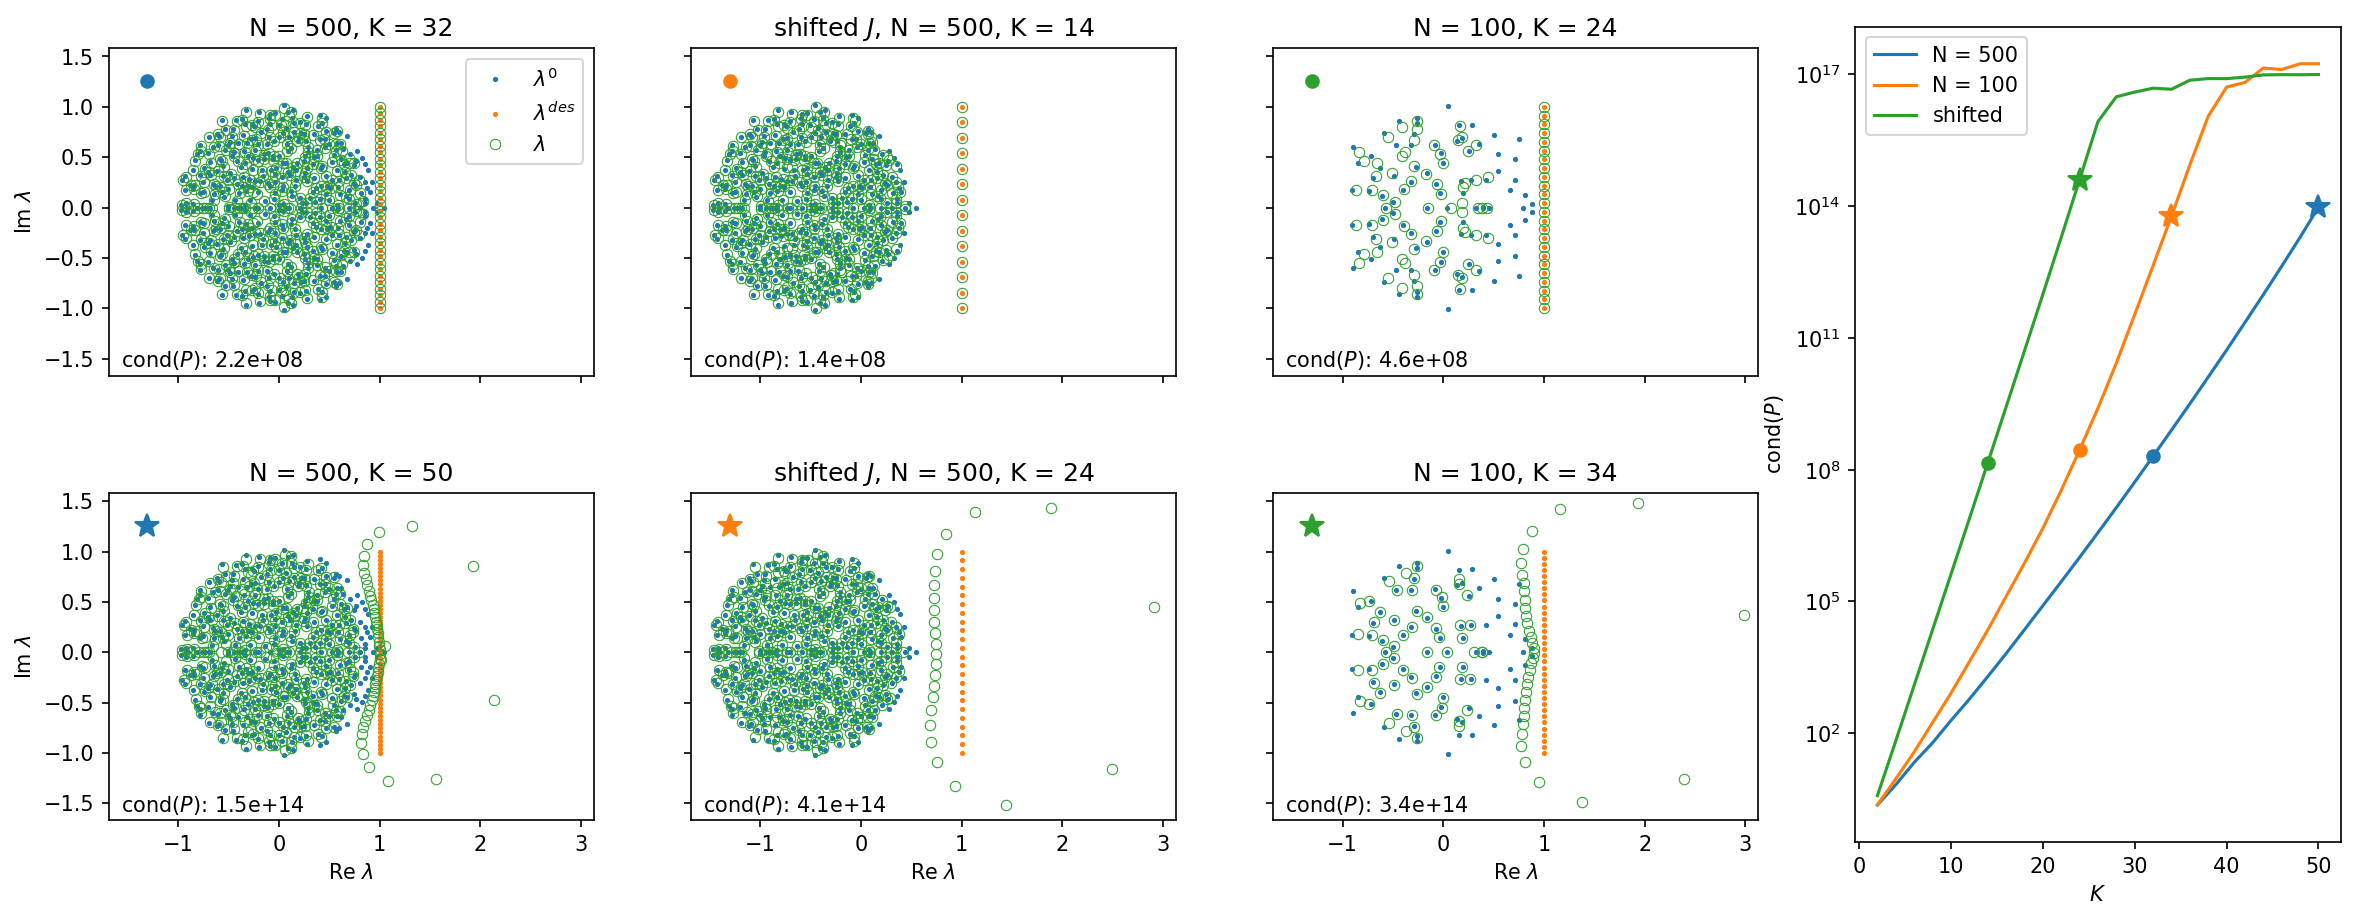

In [3]:
fig, axes = plt.subplots(2, 4, figsize=[4.8 * 4, 3.6 * 2], sharex=True, sharey=True)
npr.seed(0)

Ks = {'500': [32, 50], '100': [24, 34], 'shifted': [14, 24]}

N = 500
J = npr.randn(N, N) / N**0.5
d, r = np.linalg.eig(J)

colors = ['tab:blue', 'tab:orange', 'tab:green']
syms = ['.', '*']

def do_plot(title, sym, color, legend=False):
    l = 1 + 1j * np.linspace(-1, 1, K)
    P = 1 / (l[:, None] - d)
    ax.text(0.025, 0.025, f'cond($P$): {np.linalg.cond(P):3.1e}', transform=ax.transAxes)
    u = npr.randn(N)
    v = np.linalg.solve(r.T, np.linalg.pinv(P).sum(-1) / np.linalg.solve(r, u))
    J_ = np.linalg.solve(r.T, (r * d).T).T + u[:, None] * v
    d_ = np.linalg.eigvals(J_)
    ax.plot(d.real, d.imag, '.', markersize=3)
    ax.plot(l.real, l.imag, '.', markersize=3)
    ax.axis('scaled')
    ax.plot(d_.real, d_.imag, 'o', fillstyle='none', markersize=5, markeredgewidth=.5)
    ax.set_title(title)
    if legend: ax.legend(['$\lambda^0$', '$\lambda^{des}$', '$\lambda$'])
    ax.plot(0.08, 0.9, sym, color=color, transform=ax.transAxes, markersize=12)
    
for ax, K, sym in zip(axes[:, 0], Ks['500'], syms):
    do_plot(f'N = {N}, K = {K}', sym, colors[0], K == Ks['500'][0])

d -= 0.5
for ax, K, sym in zip(axes[:, 1], Ks['shifted'], syms):
    do_plot(f'shifted $J$, N = {N}, K = {K}', sym, colors[1])

N = 100
J = npr.randn(N, N) / N**0.5
d, r = np.linalg.eig(J)
for ax, K, sym in zip(axes[:, 2], Ks['100'], syms):
    do_plot(f'N = {N}, K = {K}', sym, colors[2])

for ax in axes[:, 0]: ax.set_ylabel('Im $\lambda$')
for ax in axes[1, :]: ax.set_xlabel('Re $\lambda$')
for ax in axes[:, 3]: ax.set_visible(False)
    
gs = axes[0, 3].get_gridspec()
for ax in axes[:, -1]: ax.remove()
ax = fig.add_subplot(gs[:, -1])
conds = []
for N, offset in zip([500, 100, 500], [0.0, 0.0, 0.5]):
    J = npr.randn(N, N) / N**0.5
    d, r = np.linalg.eig(J)
    tmp = []
    for K in range(2, 52, 2):
        l = 1 + 1j * np.linspace(-1, 1, K)
        P = 1 / (l[:, None] - (d - offset))
        tmp.append(np.linalg.cond(P))
    conds.append(tmp)

ax.plot(np.arange(2, 52, 2), np.array(conds).T)
for key, _conds, color in zip(Ks, conds, colors):
    ax.plot(Ks[key][0], _conds[Ks[key][0] // 2 - 1], '.', color=color, markersize=12)
    ax.plot(Ks[key][1], _conds[Ks[key][1] // 2 - 1], '*', color=color, markersize=12)
ax.legend(['N = 500', 'N = 100', 'shifted'])
ax.set_yscale('log')
ax.set_ylabel('cond($P$)')
ax.set_xlabel('$K$');